In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [34]:
df_calib_v5 = df = pd.read_csv('./calibDB/calib_biasV_SN04_v5_forcheck.csv' ,delimiter=',') 
df_calib_v5bis = pd.read_csv('./calibDB/calib_biasV_SN04_v5bis_forcheck.csv',delimiter=',') 
df_calib_v6 = pd.read_csv('./calibDB/calib_biasV_SN04_v6_forcheck.csv',delimiter=',') 


df_calib_v5.drop('Unnamed: 0', inplace=True, axis=1)
df_calib_v5bis.drop('Unnamed: 0', inplace=True, axis=1)
df_calib_v6.drop('Unnamed: 0', inplace=True, axis=1)

df_calib_v5 = df_calib_v5.rename(columns={'Gain_Usig BiasV':'Gain Usig BV v5', 'Offset_Sig BiasV': 'Offset Sig BV v5', 'Gain_hex BiasV':'Gain BV v5', 'Offset_hex BiasV': 'Offset BV v5'})
df_calib_v5bis = df_calib_v5bis.rename(columns={'Gain_Usig BiasV':'Gain Usig BV v5bis', 'Offset_Sig BiasV': 'Offset Sig BV v5bis', 'Gain_hex BiasV':'Gain BV v5bis', 'Offset_hex BiasV': 'Offset BV v5bis'})
df_calib_v6 = df_calib_v6.rename(columns={ 'Gain_Usig BiasV':'Gain Usig BV v6', 'Offset_Sig BiasV': 'Offset Sig BV v6', 'Gain_hex BiasV':'Gain BV v6', 'Offset_hex BiasV': 'Offset BV v6'})

In [35]:
df_calib_v5bis

,Gain Usig BV v5bis,Offset Sig BV v5bis,Gain BV v5bis,Offset BV v5bis
0,32461,173,0x7ecd,0xad
1,32529,42,0x7f11,0x2a
2,32548,4,0x7f24,0x4
3,32555,-3,0x7f2b,0xfffd
4,32560,-32,0x7f30,0xffe0
5,32553,-11,0x7f29,0xfff5
6,32548,7,0x7f24,0x7
7,32540,17,0x7f1c,0x11
8,34312,-3091,0x8608,0xf3ed
9,32525,5,0x7f0d,0x5


In [36]:
frames = [df_calib_v5, df_calib_v5bis, df_calib_v6]

df = pd.concat(frames, axis=1)
df.insert(0, 'Ch', range(0,12), True)
df

,Ch,Gain Usig BV v5,Offset Sig BV v5,Gain BV v5,Offset BV v5,Gain Usig BV v5bis,Offset Sig BV v5bis,Gain BV v5bis,Offset BV v5bis,Gain Usig BV v6,Offset Sig BV v6,Gain BV v6,Offset BV v6
0,0,32711,-325,0x7fc7,0xfebb,32461,173,0x7ecd,0xad,32544,16,0x7f20,0x10
1,1,32568,-32,0x7f38,0xffe0,32529,42,0x7f11,0x2a,32545,11,0x7f21,0xb
2,2,32548,4,0x7f24,0x4,32548,4,0x7f24,0x4,32540,19,0x7f1c,0x13
3,3,32563,-16,0x7f33,0xfff0,32555,-3,0x7f2b,0xfffd,32548,14,0x7f24,0xe
4,4,32540,8,0x7f1c,0x8,32560,-32,0x7f30,0xffe0,32548,-8,0x7f24,0xfff8
5,5,32538,21,0x7f1a,0x15,32553,-11,0x7f29,0xfff5,32546,5,0x7f22,0x5
6,6,32540,21,0x7f1c,0x15,32548,7,0x7f24,0x7,32540,22,0x7f1c,0x16
7,7,32563,-26,0x7f33,0xffe6,32540,17,0x7f1c,0x11,32548,2,0x7f24,0x2
8,8,30736,3655,0x7810,0xe47,34312,-3091,0x8608,0xf3ed,32639,-228,0x7f7f,0xff1c
9,9,32525,6,0x7f0d,0x6,32525,5,0x7f0d,0x5,32517,20,0x7f05,0x14


In [37]:
df['Gain BV v5'] = df['Gain BV v5'].apply(lambda x: int(x,16) )
df['Gain BV v5bis'] = df['Gain BV v5bis'].apply(lambda x: int(x,16) )
df['Gain BV v6'] = df['Gain BV v6'].apply(lambda x: int(x,16) )

df['Offset BV v5bis'] = df['Offset BV v5bis'].apply(lambda x: int(x,16) )
df['Offset BV v5'] = df['Offset BV v5'].apply(lambda x: int(x,16) )
df['Offset BV v6'] = df['Offset BV v6'].apply(lambda x: int(x,16) )



#df_dec = df.apply(lambda x: int(x,16), axis=1, result_type = 'broadcast')


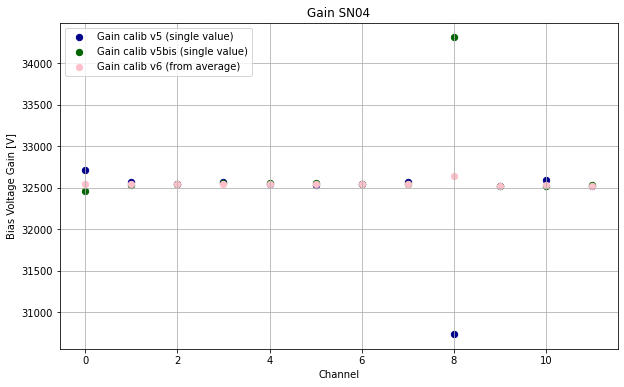

In [48]:

plt.figure(figsize=(10,6))

ax = plt.gca()

ax = df.plot.scatter(x='Ch', y='Gain BV v5', color="DarkBlue", label="Gain calib v5 (single value)", ax=ax, marker = 'o', s=40)
ax = df.plot.scatter(x='Ch', y='Gain BV v5bis', color="DarkGreen", label="Gain calib v5bis (single value)", ax=ax, marker = 'o', s=40)
ax = df.plot.scatter(x='Ch', y='Gain BV v6', color="Pink", label="Gain calib v6 (from average)", ax=ax, marker = 'o', s=40 )

plt.grid(b=True)
plt.title('Gain SN04')
plt.xlabel('Channel')
plt.ylabel('Bias Voltage Gain [V]')

plt.show()


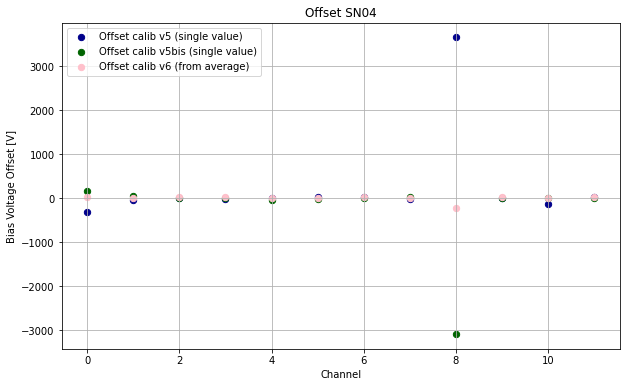

In [49]:
plt.figure(figsize=(10,6))

ax = plt.gca()

ax = df.plot.scatter(x='Ch', y='Offset Sig BV v5', color="DarkBlue", label="Offset calib v5 (single value)", ax=ax, marker = 'o', s=40)
ax = df.plot.scatter(x='Ch', y='Offset Sig BV v5bis', color="DarkGreen", label="Offset calib v5bis (single value)", ax=ax, marker = 'o', s=40)
ax = df.plot.scatter(x='Ch', y='Offset Sig BV v6', color="Pink", label="Offset calib v6 (from average)", ax=ax, marker = 'o', s=40)

plt.grid(b=True)
plt.title('Offset SN04')
plt.xlabel('Channel')
plt.ylabel('Bias Voltage Offset [V]')

plt.show()


In [8]:
df

,Ch,Gain BV v5,Offset BV v5,Gain BV v5bis,Offset BV v5bis,Gain BV v6,Offset BV v6
0,0,32711,65211,32461,173,32544,16
1,1,32568,65504,32529,42,32545,11
2,2,32548,4,32548,4,32540,19
3,3,32563,65520,32555,65533,32548,14
4,4,32540,8,32560,65504,32548,65528
5,5,32538,21,32553,65525,32546,5
6,6,32540,21,32548,7,32540,22
7,7,32563,65510,32540,17,32548,2
8,8,30736,3655,34312,62445,32639,65308
9,9,32525,6,32525,5,32517,20


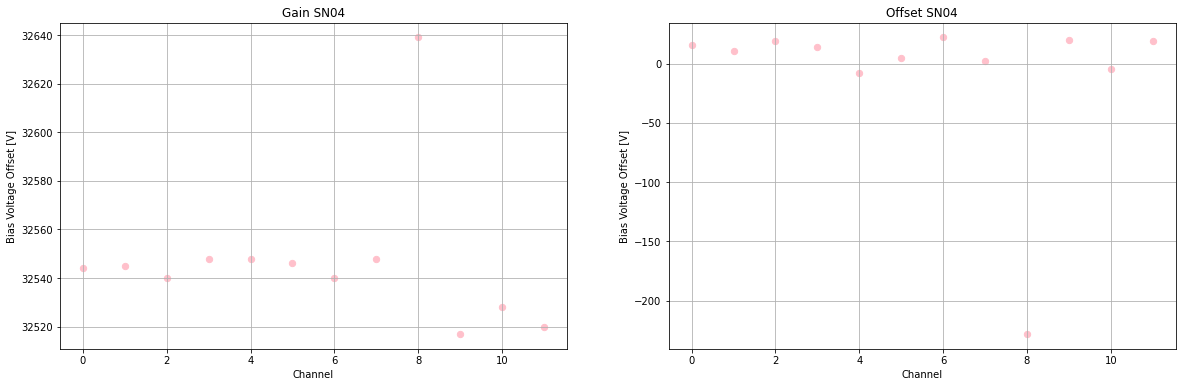

In [87]:

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, constrained_layout=True,figsize=(15, 6))
#fig.suptitle('Gain and offset for bias voltage from average')
plt.figure(figsize=(20,6))


 
ax = plt.gca()

plt.subplot(1, 2, 1) 
plt.scatter(x=df['Ch'], y=df['Gain BV v6'], color="Pink", label="Gain calib v6 (from average)",   marker = 'o', s=40)
#ax1 = df.plot.scatter(x='Ch', y='Gain BV v6', color="Pink", label="Gain calib v6 (from average)", ax = ax1,  marker = 'o', s=40 )
plt.grid(b=True)
plt.title('Gain SN04')
plt.xlabel('Channel')
plt.ylabel('Bias Voltage Offset [V]')

plt.subplot(1, 2, 2) 
#ax2 = df.plot.scatter(x='Ch', y='Offset Sig BV v6', color="Pink", label="Offset calib v6 (from average)", ax = ax2, marker = 'o', s=40)
plt.scatter(x=df['Ch'], y=df['Offset Sig BV v6'], color="Pink", label="Offset calib v6 (from average)", marker = 'o', s=40)


plt.grid(b=True)
plt.title('Offset SN04')
plt.xlabel('Channel')
plt.ylabel('Bias Voltage Offset [V]')

plt.show()